#                                                 Titanic

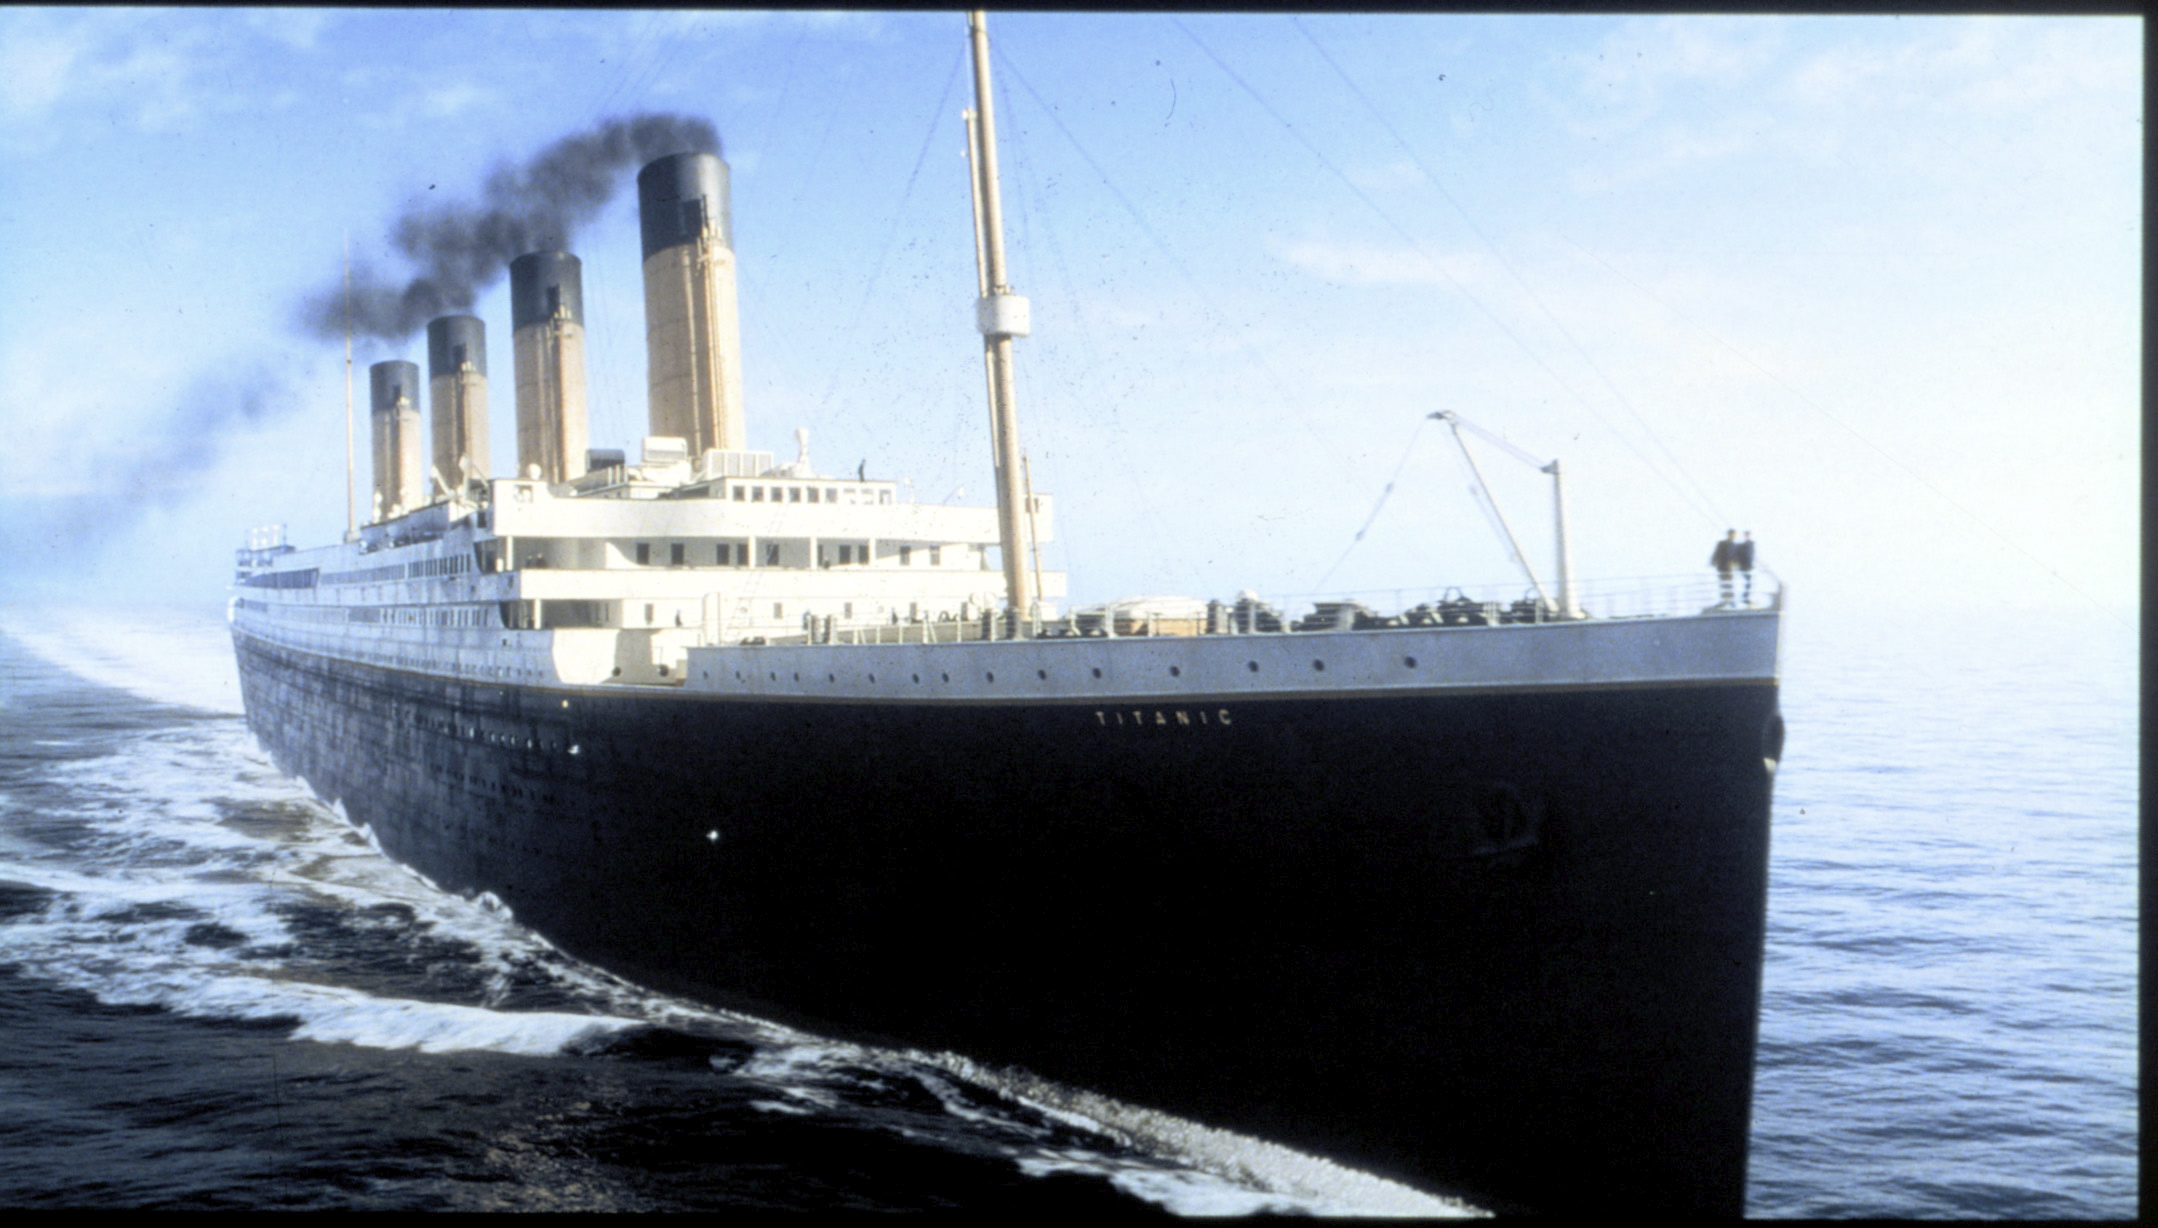

# Goal of this project:

The goal of this project is to predict either person survived or not. We would use such charachetristics to analyze: gender, age, ticket class etc.  

In the train doc we have full information and in the test we are missing survive or not, as this would be our task to predict it. 

In the part 1 we will analyze our data and will do some comparisons. 

# 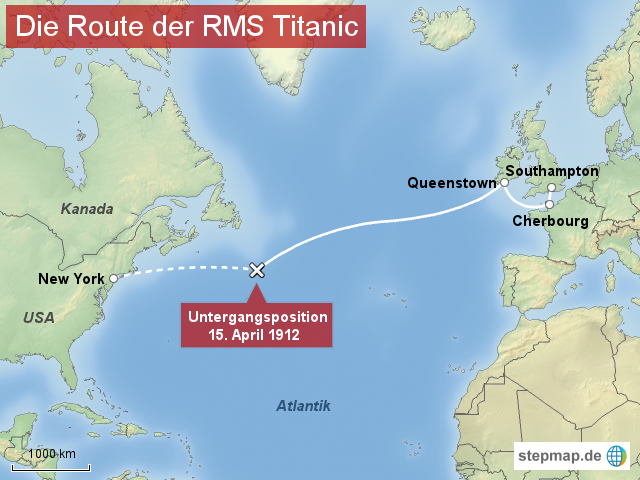

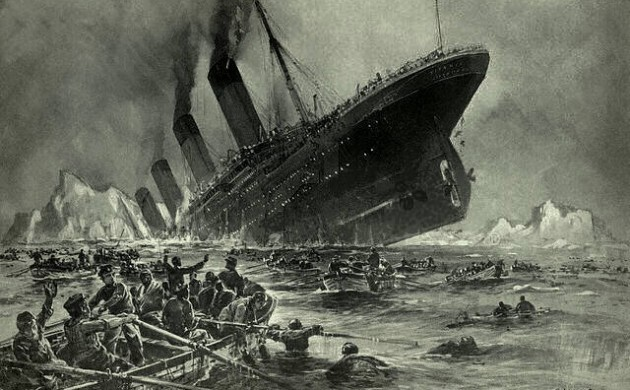

### Part 1

### Loading our data

In [9]:
import pandas as pd

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("train", df_train.shape)
print("test", df_test.shape)

train (891, 12)
test (418, 11)


### Analyzing our data

In [4]:
df_train.shape[0] + df_test.shape[0]

1309

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Explanation of the features:

- PassengerId - A numeric identifier assigned to each passenger.

- Survived - Whether the passenger survived (1) or not (0) - this is our answer, or sometimes they say - the target variable (English target variable).

- Pclass - Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower)

- Name - The name and surname of the passenger and additional information (for example, Mr. we still need it)

- Sex - Gender of the passenger (from English male male and female - woman)

- Age - Passenger's age

- SibSp - The presence of brothers and sisters (from English brother - brother, sister - sister, stepbrother - half-brother, stepsister - half-sister) / spouses (husband - husband, wife - wife, [lovers and lovers were not marked - although it is possible they can be calculated]) aboard the Titanic

- Parch - The presence of parents (mother - mom, father - dad) / children (daughter - daughter, son - son, stepdaughter - stepdaughter, stepson - stepson) on board the Titanic. Note: some kids only traveled with a nanny, so parch=0 for them...

- Ticket - Passenger's ticket number

- Fare - How much the passenger paid for the ticket (in pounds)

- Cabin - Cabin number - ship compartment (letters A, B, C, D and numbers).

- Embarked - In which port the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
df_train.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True)

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64

### We have noticed that women had higher chance to survive compare to men: 1(survived), 0 (not survived) and especially women from the class 1st and 2nd - 96% and 92% chances to survive. 

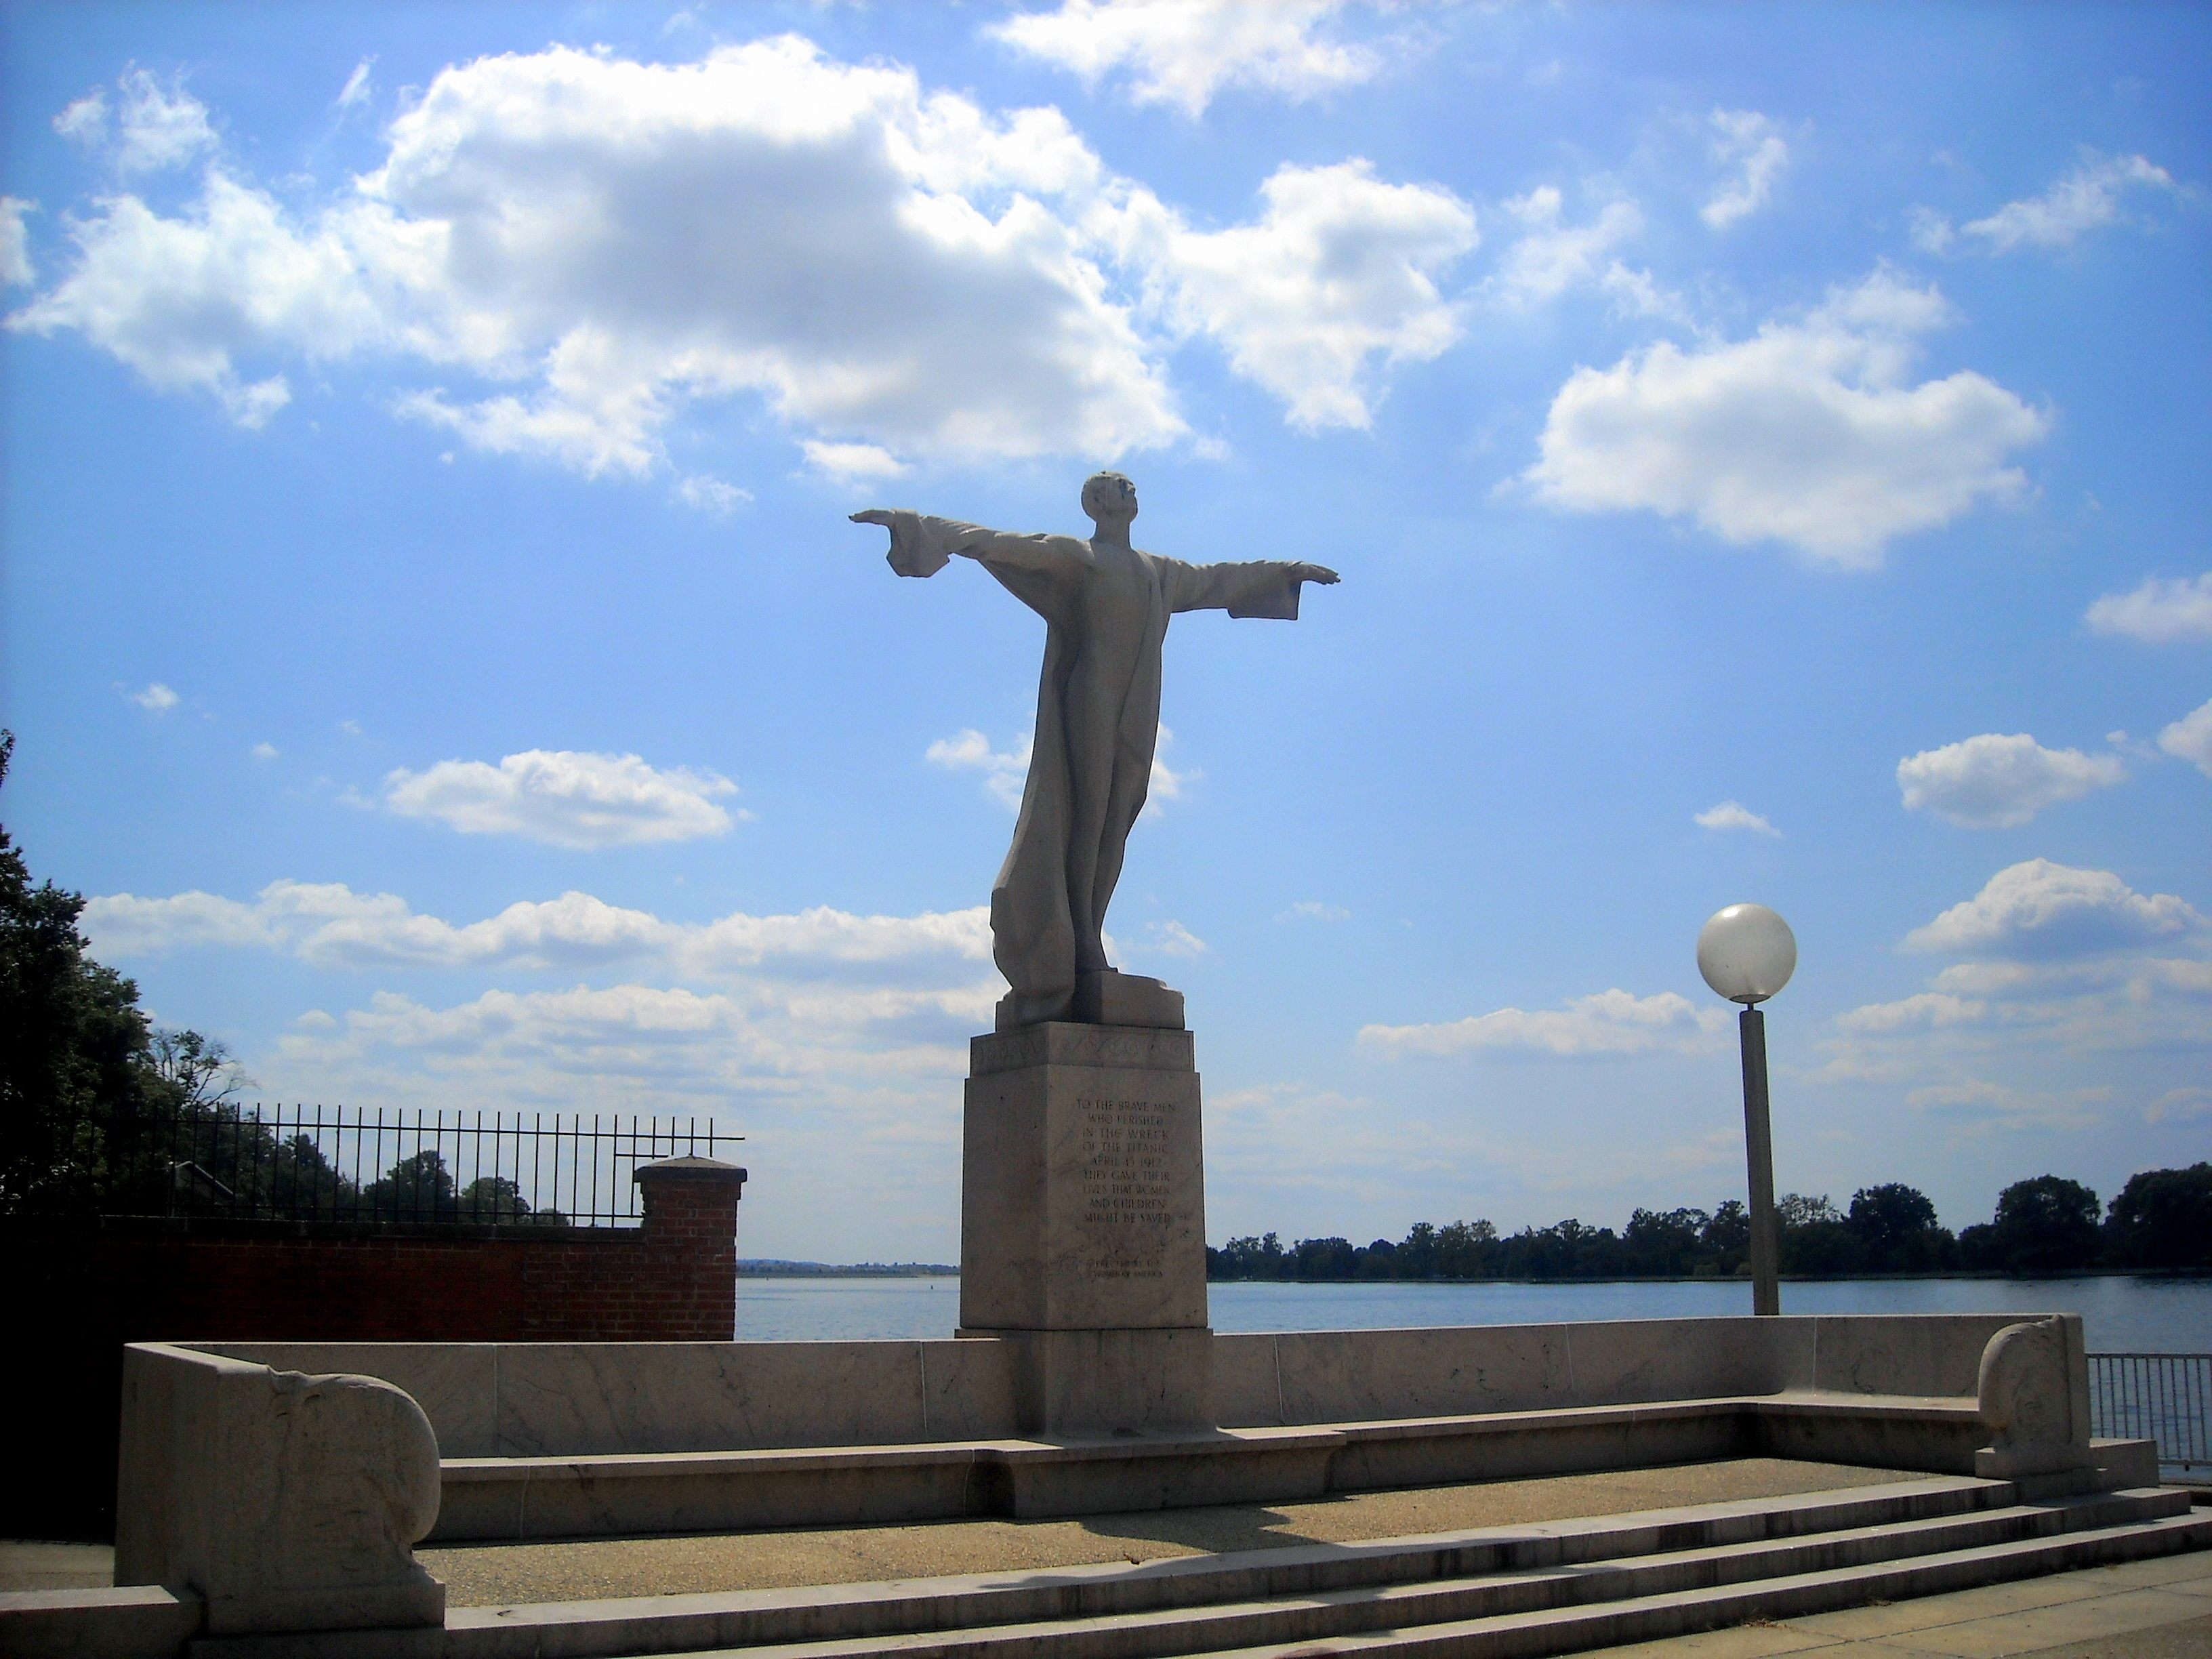

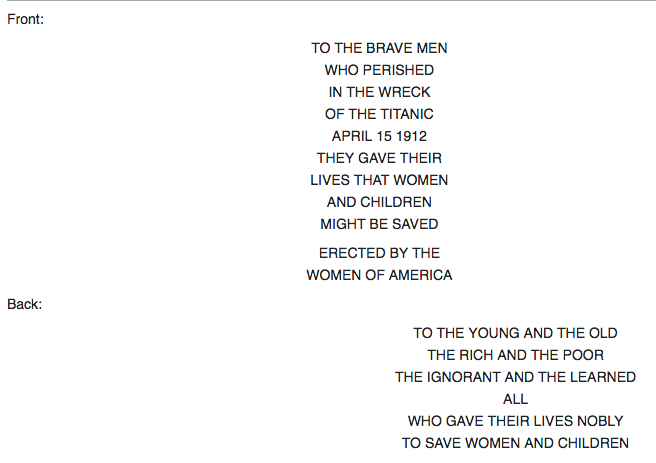

# Train vs Test

In [8]:
describe_fields = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

print("Train: males")
print(df_train[df_train.Sex == "male"][describe_fields].describe())

print("Test: males")
print(df_test[df_test.Sex == "male"][describe_fields].describe())

print("=" * 30)

print("Train: females")
print(df_train[df_train.Sex == "female"][describe_fields].describe())

print("Test: females")
print(df_test[df_test.Sex == "female"][describe_fields].describe())

Train: males
              Age        Fare      Pclass       SibSp       Parch
count  453.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702
std     14.678201   43.138263    0.813580    1.061811    0.612294
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000    0.000000
75%     39.000000   26.550000    3.000000    0.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    5.000000
Test: males
              Age        Fare      Pclass       SibSp       Parch
count  205.000000  265.000000  266.000000  266.000000  266.000000
mean    30.272732   27.527877    2.334586    0.379699    0.274436
std     13.389528   41.079423    0.808497    0.843735    0.883745
min      0.330000    0.000000    1.000000    0.000000    0.000000
25%     22.000000    7.854200    2.000000    0.0000

### Conclusions after this comparison: 

So here we see that the average age (Age) of the men in train and test is about 30 years old (looks like). On the other hand, the ticket price (Fare) in train = 25, and in test = 27 - here it's a little bit different from the plan. The average class value (Pclass) is close to 2.38.

It can be seen here that the maximum age value in the train sample is 80 for men and 63 for women. The maximum value for the test sample is 60 for men, 76 for women.

Again, why are we checking all of this at all? Well, we want to know if the dataset in train is very different from test. At the moment we do it a little by eye. There are several formal methods by which we can check if these two distributions are similar or not.

In general, we can say that the data are quite similar, there is a difference - but not so big. Anomalies are not observed. As I already mentioned, for example, the average age of women in the train sample is almost 28 years old, and in the test sample it is 30 years old. It's not that big of a difference, although it is.

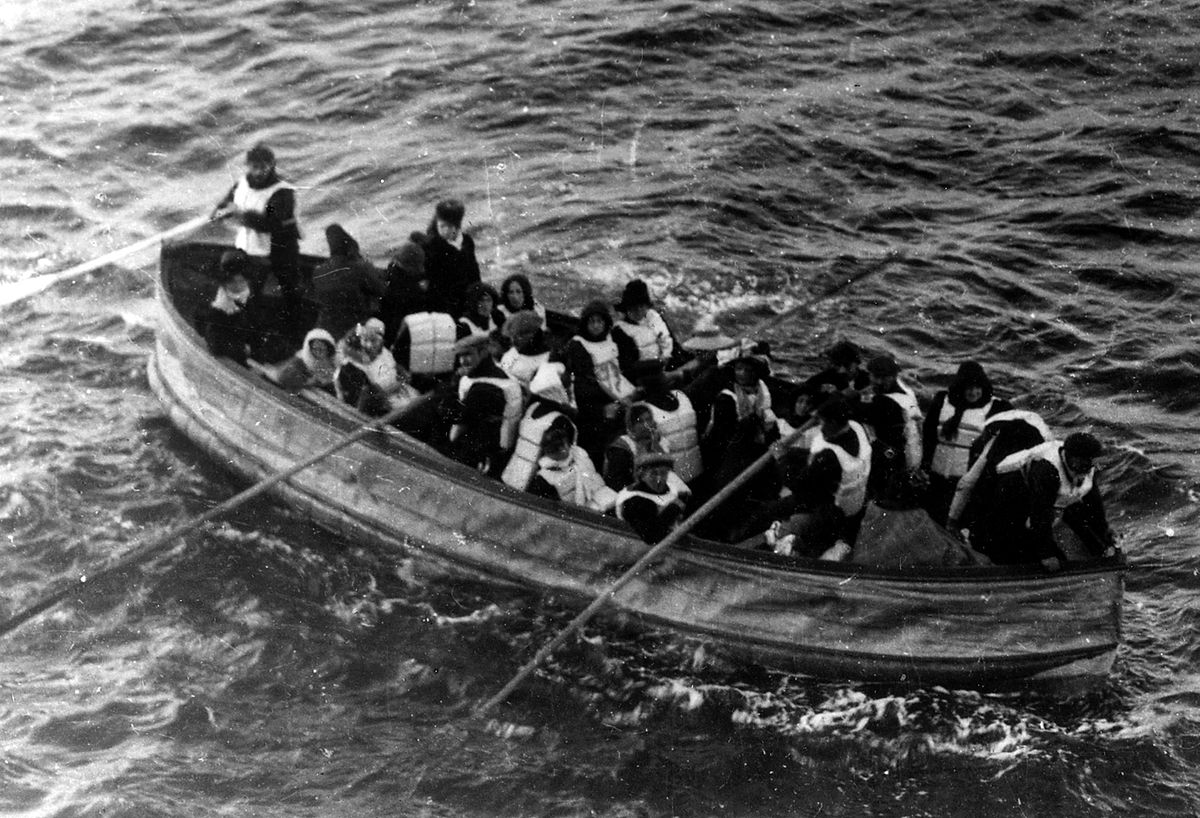